In [1]:
from photutils import DAOStarFinder, CircularAperture
from astropy.io import fits as fits
from astropy.stats import mad_std
import numpy as np
import matplotlib.pyplot as plt

In [5]:
frames_in_set = 10
object_sets = 40
star_sets = 40
dark_sets = 11

object_frames = object_sets * frames_in_set
star_frames = star_sets * frames_in_set
dark_frames = dark_sets * frames_in_set

x = 1039
y = 1391

path_raw = 'C:/Users/Calum/Documents/My Documents/354_Eleonora_Flyby2/Simulated_Data/Image_Frames/'
path_dark = 'C:/Users/Calum/Documents/My Documents/354_Eleonora_Flyby2/Simulated_Data/Dark_Frames/'
path_clean = 'C:/Users/Calum/Documents/My Documents/354_Eleonora_Flyby2/Simulated_Data/Cleaned_Frames/'
path_comb = 'C:/Users/Calum/Documents/My Documents/354_Eleonora_Flyby2/Simulated_Data/Combined_Frames/'

In [3]:
time = []

for j in range(object_sets):
    with fits.open(path_raw + 'Pic_' + str((j+1)*10-9) + '.fit') as hdul:
        hours = 3600 * int(hdul[0].header['DATE-OBS'][11:13])
        mins = 60 * int(hdul[0].header['DATE-OBS'][14:16])
        secs = int(hdul[0].header['DATE-OBS'][17:19])
        time_start = hours + mins + secs
        
    with fits.open(path_raw + 'Pic_' + str((j+1)*10-1) + '.fit') as hdul:
        hours = 3600 * int(hdul[0].header['DATE-OBS'][11:13])
        mins = 60 * int(hdul[0].header['DATE-OBS'][14:16])
        secs = int(hdul[0].header['DATE-OBS'][17:19])
        time_end = hours + mins + secs
        
    time.append((time_start + time_end) / 2)
    
time_begin = time[0]
for j in range(object_sets):
    time[j] -= time_begin

In [9]:
ast_x = 237.06
ast_y = 132.99
coord_ast = np.sqrt(ast_x**2 + ast_y**2)
brightness_ast = []

for j in range(object_sets):
    with fits.open(path_comb + 'image' + '_' + str(j+1) + '.fit') as hdul:
        data = hdul[0].data
        
    FWHM = 10
    std = mad_std(data)
    daofind = DAOStarFinder(fwhm = FWHM, threshold = 22*std)
    sources = daofind(data)
    
    diff = 1000000
    for k in range(sources['flux'].size):
        coord = np.sqrt(sources['xcentroid'][k]**2 + sources['ycentroid'][k]**2)
        if abs(coord_ast - coord) < diff: 
            diff = abs(coord_ast - coord)
            index = k
            
    ast_x = sources['xcentroid'][index]
    ast_y = sources['ycentroid'][index]
    coord_ast = np.sqrt(ast_x**2 + ast_y**2)
    brightness_ast.append(sources['flux'][index])

Text(0.5, 1.0, 'Light Curve of the simulated asteroid')

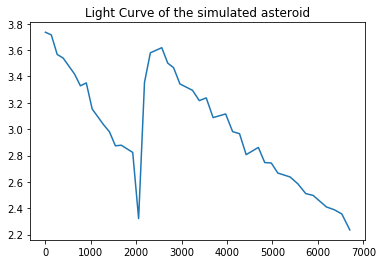

In [11]:
plt.plot(time, brightness_ast)
plt.title('Light Curve of the simulated asteroid')